# Exercise 4

## 1. Periodically Driven, Viscously Damped Pednulum

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy.integrate import solve_ivp

%matplotlib inline

In [0]:
def forced_pendulum(t, u, g, m, w):
    u_1 = u[0]
    u_2 = u[1]
    u_3 = u[2]
    
    f_1 = u_2
    f_2 = -2. * g * u_2 - np.sin(u_1) + m * np.sin(w * u_3)
    f_3 = 1.
    
    return [f_1, f_2, f_3]

In [0]:
def plot_pendulum_solution(solution, params=None):
    N = len(solution.y[0])
    cmap = plt.cm.jet(np.linspace(0, 1, N))
    cbar = plt.cm.jet
    norm = mpl.colors.Normalize(vmin=solution.t[0], vmax=solution.t[-1])

    fig = plt.figure()
    ax1 = plt.subplot2grid((3, 1), (0, 0))
    ax2 = plt.subplot2grid((3, 1), (1, 0), rowspan=2)
    cax = ax1.twinx()
    mpl.colorbar.ColorbarBase(cax, cmap=cbar, norm=norm, orientation='horizontal')
    cax.set_ylim(0,20000)
    
    if params:
        ax1.set_title(r'$\mu = {},\ \gamma = {},\ \omega = {}$'.format(*params))

    ax1.plot(solution.y[2], solution.y[0], label=r'$u_1$')
    ax1.plot(solution.y[2], solution.y[1], label=r'$u_2$')
    
    ax1.set_xlabel(r'time $t$')
    ax1.set_ylabel(r'$u_i$')

    ax1.legend(markerscale=20, framealpha=1, loc=1)

    ax1.set_xlim(solution.t[0], solution.t[-1])
    ax1.set_ylim(-np.pi, np.pi)

    ax2.scatter(*solution.y[:2], s=1, marker='.', c = cmap)
    
    ax2.set_xlabel(r'$u_1$')
    ax2.set_ylabel(r'$u_2$')

    ax2.set_xlim(-np.pi, np.pi)
    
    print(cax.get_ylim())
    
    fig.set_size_inches(8, 12)
    plt.show()
    
def sim_pendulum(params, u0=[0,0,0], t_start=0., t_stop=500., t_steps=100000):
    m, g, w = params
    
    t_range = np.linspace(t_start, t_stop, int(t_steps))

    solution = solve_ivp(lambda t, u: forced_pendulum(t, u, g, m, w), t_span=(t_start, t_stop), y0=u0, t_eval=t_range)
    solution.y[0] = [a % (2*np.pi) - np.pi for a in solution.y[0] + np.pi]

    pos = np.where(np.abs(np.diff(solution.y[0])) >= .5 )[0]+1
    solution.y = [np.insert(solution.y[0], pos, np.nan), 
                  np.insert(solution.y[1], pos, np.nan), 
                  np.insert(solution.y[2], pos, np.nan)]

    plot_pendulum_solution(solution, (m,g,w))

(0.0, 20000.0)


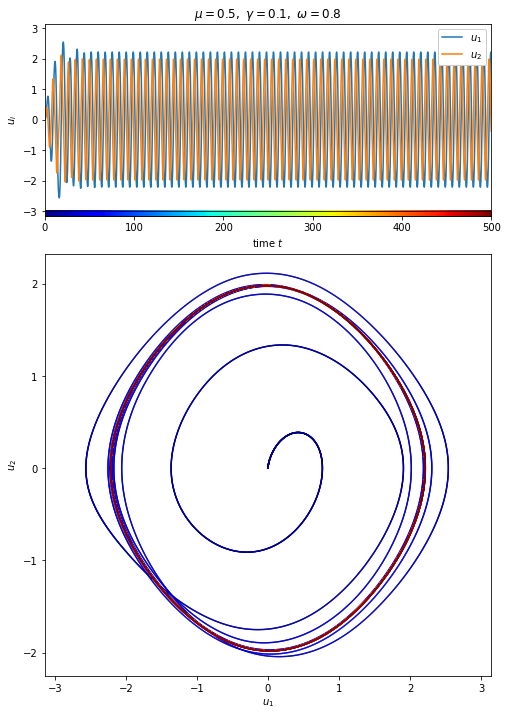

In [0]:
sim_pendulum((.5, .1, .8))

(0.0, 20000.0)


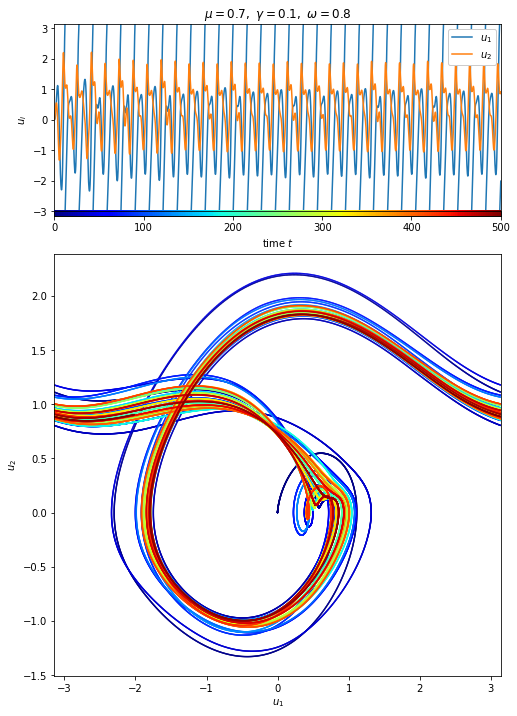

In [0]:
sim_pendulum((.7, .1, .8))

(0.0, 20000.0)


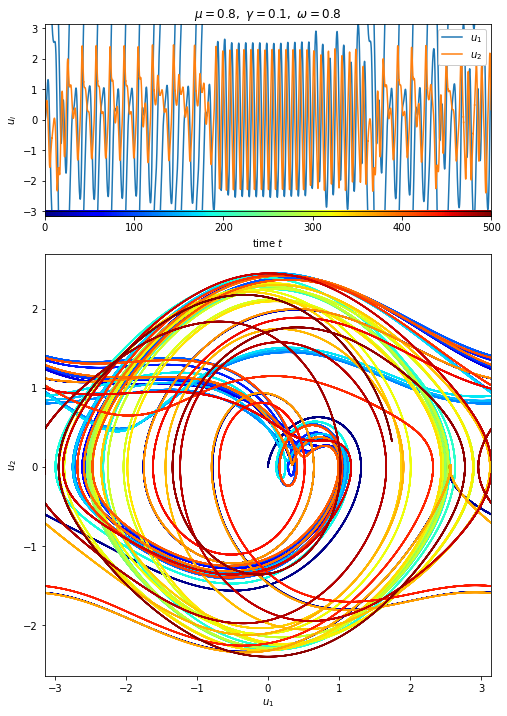

In [0]:
sim_pendulum((.8, .1, .8), t_steps=1000000)

(0.0, 20000.0)


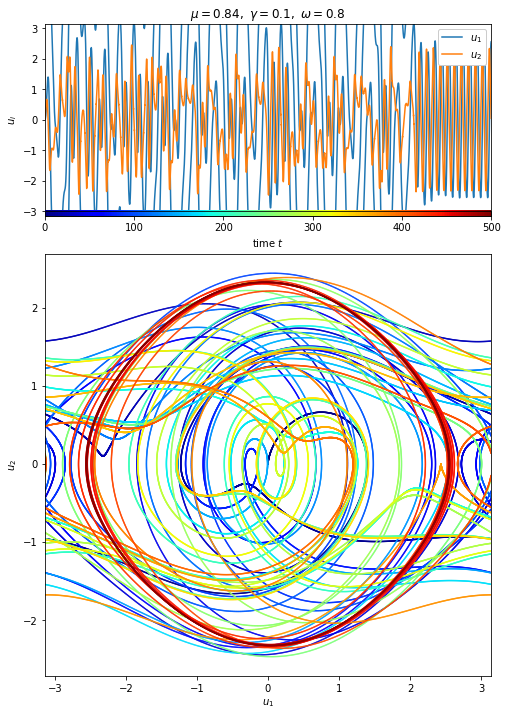

In [0]:
sim_pendulum((.84, .1, .8))

(0.0, 20000.0)


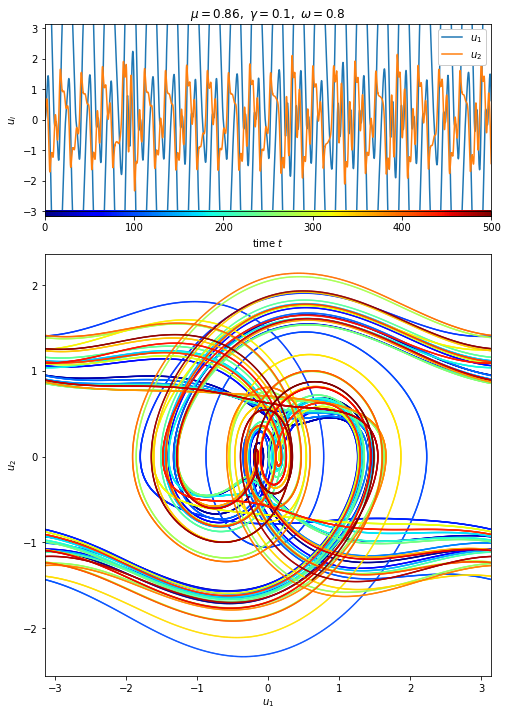

In [0]:
sim_pendulum((.86, .1, .8))

(0.0, 20000.0)


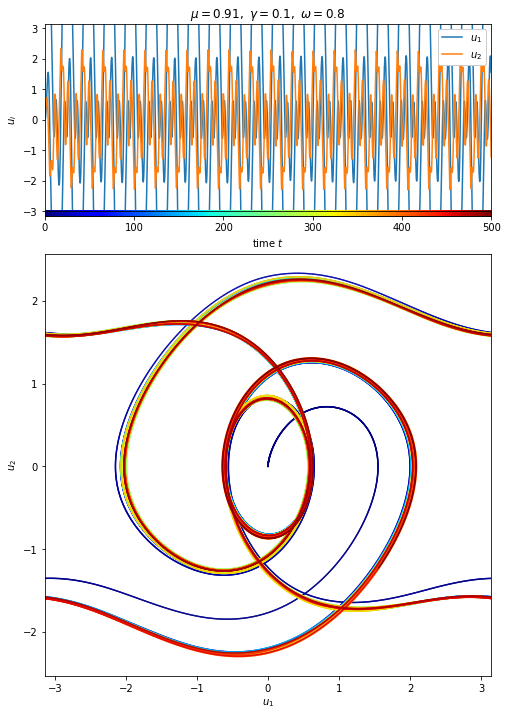

In [0]:
sim_pendulum((.91, .1, .8))

(0.0, 20000.0)


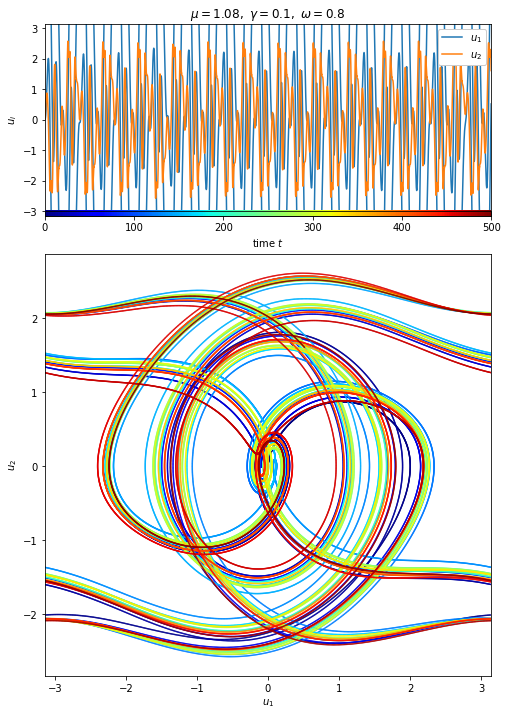

In [0]:
sim_pendulum((1.08, .1, .8))

(0.0, 20000.0)


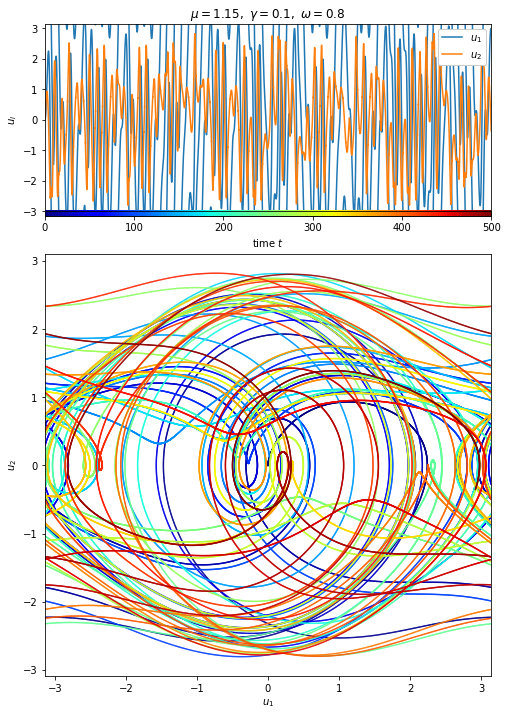

In [0]:
sim_pendulum((1.15, .1, .8))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

from scipy.integrate import solve_ivp


%matplotlib inline

In [ ]:
def forced_pendulum(t, u, g, m, w):
    u_1 = u[0]
    u_2 = u[1]
    u_3 = u[2]
    
    f_1 = u_2
    f_2 = -2. * g * u_2 - np.sin(u_1) + m * np.sin(w * u_3)
    f_3 = 1.
    
    return [f_1, f_2, f_3]

In [48]:
def sim_pendulum(params, u0=[0,0,0], t_start=0., t_stop=500., t_steps=100000, wrap=True):
    m, g, w = params
    t_range = np.linspace(t_start, t_stop, int(t_steps))

    solution = solve_ivp(lambda t, u: forced_pendulum(t, u, g, m, w), t_span=(t_start, t_stop), y0=u0, t_eval=t_range)
    if wrap:
        solution.y[0] = [a % (2*np.pi) - np.pi for a in solution.y[0] + np.pi]
    
    return solution

def eigenvalue(solution, g):
    ev1 = []
    ev2 = []
    for a in solution.y[0]:
        if ((g**2 - np.cos(a))< 0) :
            ev1.append(-g)
            ev2.append(-g)
        else:
            ev1.append(-g + cmath.sqrt(g**2 - np.cos(a)))
            ev2.append(-g - cmath.sqrt(g**2 - np.cos(a)))
    ev=[ev1,ev2]
    return ev
"""
def calc_eigenvalues(g, u_1):
    if  isinstance(u_1 ,(int,float)):
        term = np.sqrt(np.complex(g**2 - np.cos(u_1)))
        sig_1 = -g + np.real(term)
        sig_2 = -g - np.real(term)

        return sig_1, sig_2
    
    else:
        out_1 = []
        out_2 = []
        for u in u_1.astype(complex):
            term = np.sqrt(g**2 - np.cos(u))
            sig_1 = -g + np.real(term)
            sig_2 = -g - np.real(term)
            out_1.append(sig_1)
            out_2.append(sig_2)

        return out_1, out_2
"""
def difference(solution_a,solution_b):
    return np.sqrt((solution_a.y[0]- solution_b.y[0])**2+(solution_a.y[1]- solution_b.y[1])**2)

def calc_eigenvectors(g, u_1):
    term = np.real(np.sqrt(np.complex(g**2 - np.cos(u_1))))
    e_1 = [-g - term, np.cos(u_1)]
    e_2 = [-g + term, np.cos(u_1)]

    return e_1, e_2


def mean_int (ev,t_start=0., t_stop=500., t_steps=100000):
    T = np.linspace(t_start, t_stop, int(t_steps))
    mean_max=[]
    mean_min=[]
    
    for i in range(len(T)-1):
        if i == 0:
            mean_max.append((ev[0][i+1]+ev[0][i]))
            mean_min.append((ev[1][i+1]+ev[1][i]))
        else:
            mean_max.append(1/T[i]*(T[i-1]*mean_max[i-1]+(ev[0][i+1]+ev[0][i])*(T[i+1]-T[i])))
            mean_min.append(1/T[i]*(T[i-1]*mean_min[i-1]+(ev[1][i+1]+ev[1][i])*(T[i+1]-T[i])))
            
    return[mean_max, mean_min]
   

# 2a) #
# periodic regime #

In [49]:

solution =sim_pendulum((0.91, 0.1, .8))
eig, eig_  = calc_eigenvalues(0.1,solution.y[0])


Text(0.5, 0, 'timesteps')

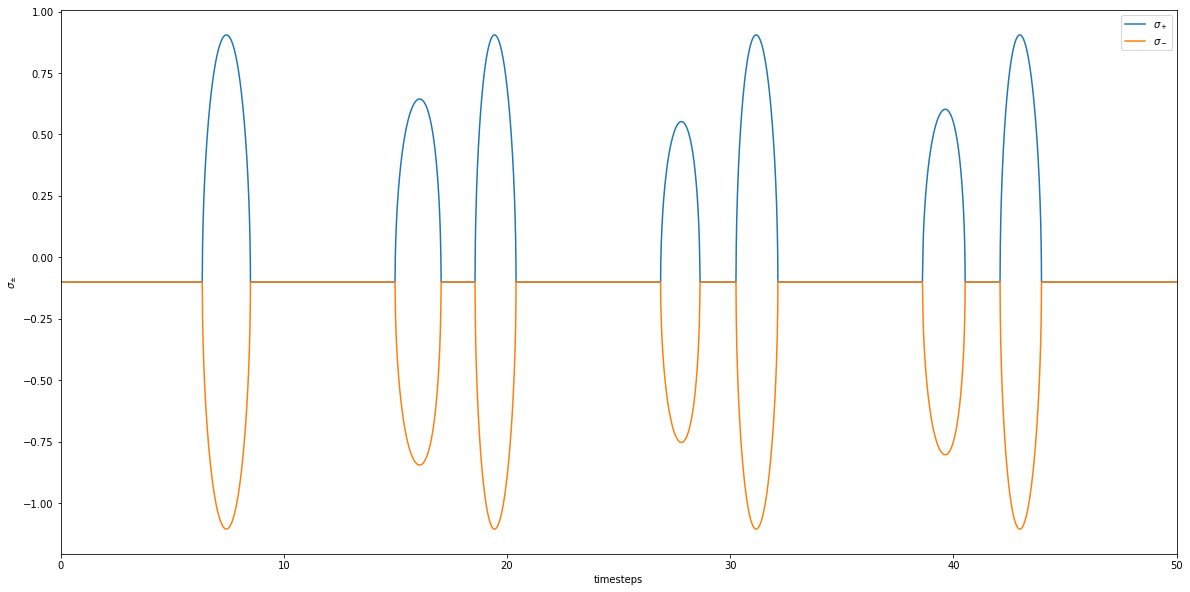

In [63]:
plt.figure(figsize=(20,10))
plt.plot(solution.y[2], eig,label= r'$\sigma_+$')
plt.plot(solution.y[2], eig_, label= r'$\sigma_-$')
plt.xlim(0,50)
plt.legend()
plt.ylabel(r'$\sigma_{\pm}$')
plt.xlabel('timesteps')

# chaotic regime #

In [65]:
ev = eigenvalue(sim_pendulum((1.15, 0.1, 0.8)),0.1)
solution =sim_pendulum((1.15, 0.1, .8))

#print(solution.y[0])


Text(0.5, 0, 'timesteps')

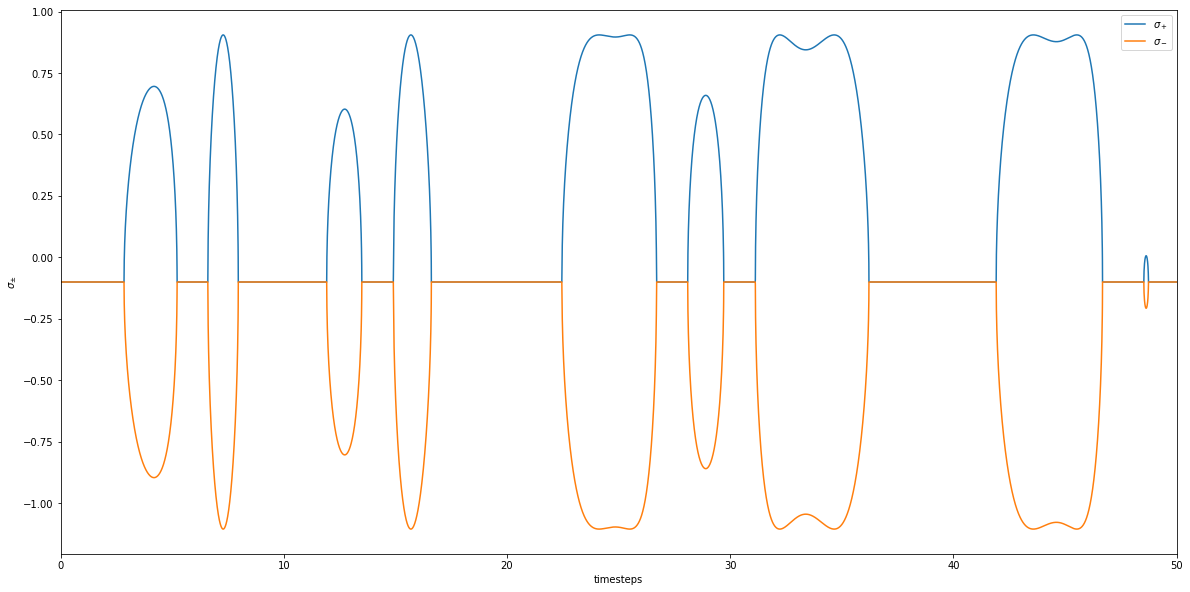

In [66]:
plt.figure(figsize=(20,10))
plt.plot(solution.y[2], ev[0],label= r'$\sigma_+$')
plt.plot(solution.y[2], ev[1],label= r'$\sigma_-$')
plt.xlim(0,50)
plt.legend()
plt.legend()
plt.ylabel(r'$\sigma_{\pm}$')
plt.xlabel('timesteps')

# 2b #
# unstabel #

Text(0, 0.5, 'difference(t)')

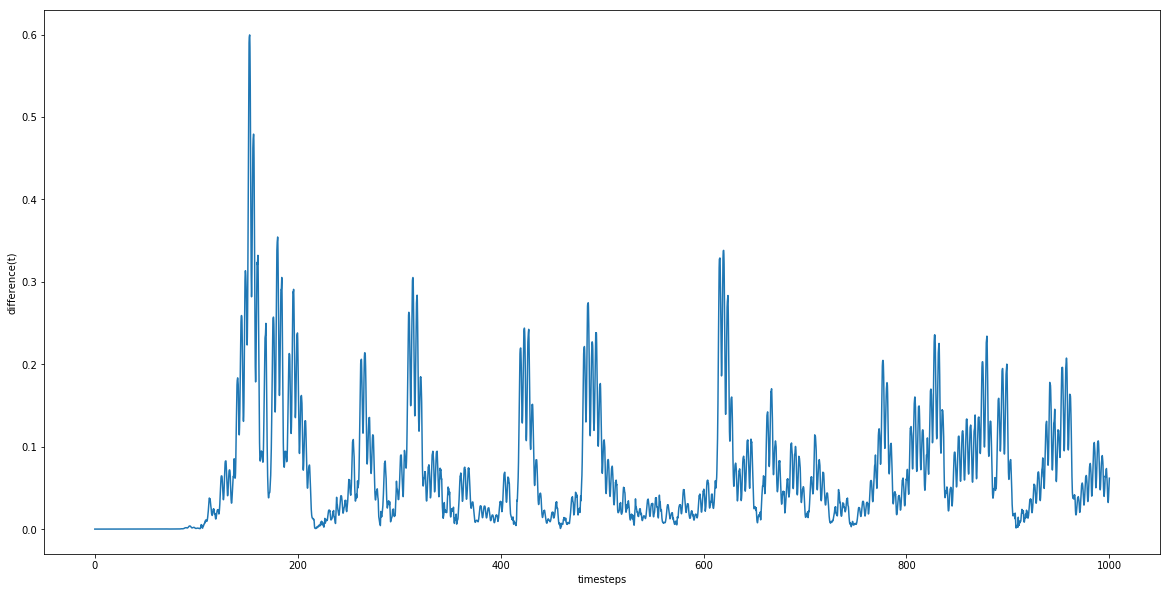

In [68]:
m, g, w = .87, .1, .8
u0 = [2.6, 0, 0]
eps = 1e-9
ev = calc_eigenvectors(g, u0[0])[0]
perp = [u0[0] + ev[0]*eps,u0[1] + ev[1]*eps, u0[2]]

simulation_a = sim_pendulum((m, g, w), t_stop=1000, u0=perp, wrap=False)
simulation_b = sim_pendulum((m, g, w), t_stop=1000, u0=u0, wrap=False)

diff = difference(simulation_a,simulation_b)
plt.figure(figsize=(20,10))
plt.plot(simulation_a.y[2],diff)
plt.xlabel('timesteps')
plt.ylabel('difference(t)')

# stabel #

Text(0, 0.5, 'difference(t)')

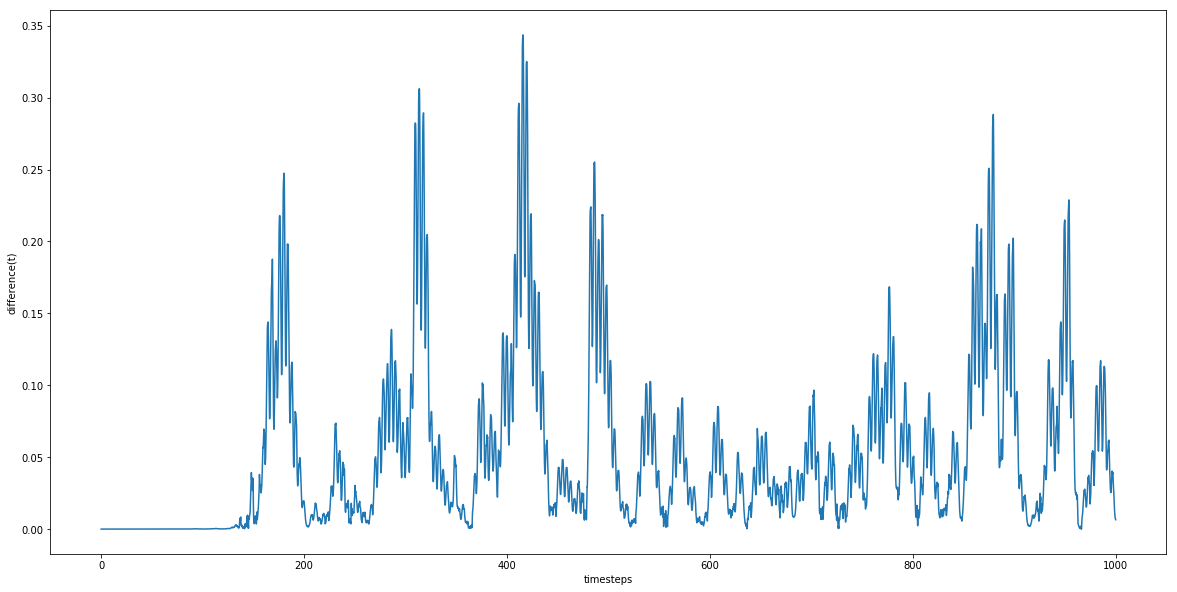

In [69]:
m, g, w = .87, .1, .8
u0 = [2.6, 0, 0]
eps = 1e-9
ev = calc_eigenvectors(g, u0[0])[1]
perp = [u0[0] + ev[0]*eps,u0[1] + ev[1]*eps, u0[2]]

simulation_a = sim_pendulum((m, g, w), t_stop=1000, u0=perp, wrap=False)
simulation_b = sim_pendulum((m, g, w), t_stop=1000, u0=u0, wrap=False)

diff = difference(simulation_a,simulation_b)


plt.figure(figsize=(20,10))
plt.plot(simulation_a.y[2],diff)
plt.xlabel('timesteps')
plt.ylabel('difference(t)')

# 2c) # 

In [57]:
m, g, w = .87, .1, .8
t_start=1000
t_stop=1500
t_steps=100000
simulation_a = sim_pendulum((m, g, w), t_start=t_start,t_stop=t_stop, t_steps=t_steps)#, wrap=False)
ev= eigenvalue(simulation_a, g)
mean = mean_int(ev, t_start, t_stop, t_steps)

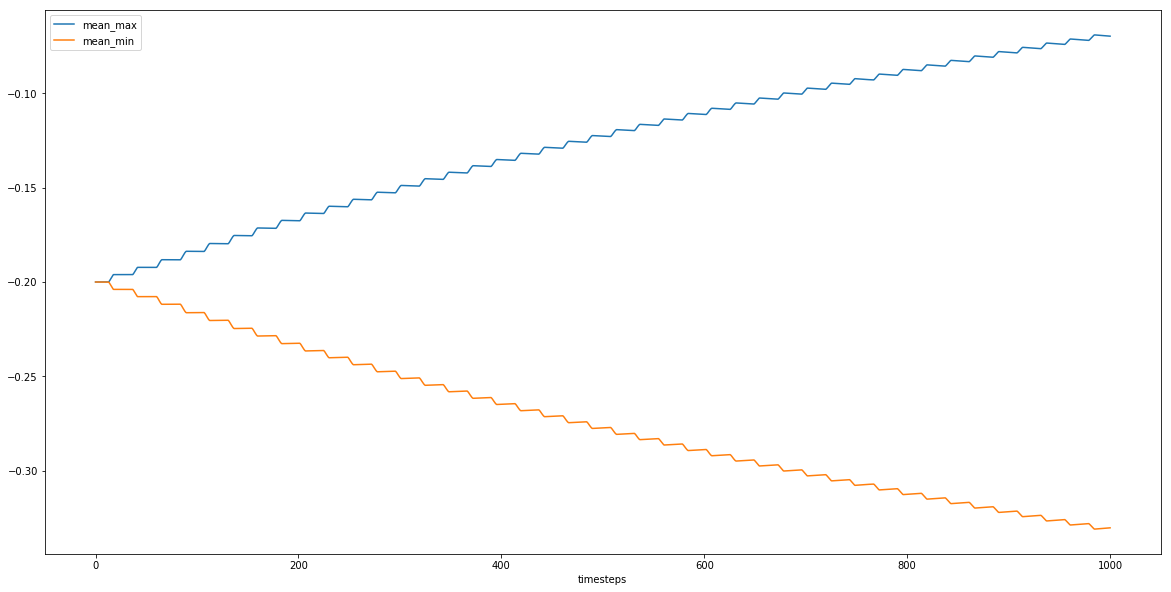

In [71]:
plt.figure(figsize=(20,10))
plt.plot(simulation_a.y[2][:-1],mean[0],label= 'mean_max')
plt.plot(simulation_a.y[2][:-1],mean[1],label= 'mean_min')
plt.xlabel('timesteps')
plt.legend()

# Exercise 4

## 3. Stroboscope on Pendulum

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

%matplotlib inline

In [2]:
def forced_pendulum(t, u, g, m, w):
    u_1 = u[0]
    u_2 = u[1]
    u_3 = u[2]
    
    f_1 = u_2
    f_2 = -2. * g * u_2 - np.sin(u_1) + m * np.sin(w * u_3 *np.pi * 2)
    f_3 = 1.
    
    return [f_1, f_2, f_3]

The tricky thing is to find the right slicing of the simulation output, such that we flash the data at a stroboscope frequency equal to the excitation frequency, taking into account the time stepsize.

In [56]:

def sim_pendulum_strobo(params, u0=[0,0,0], t_start=0., t_stop=100000., t_steps=1000001):
    m, g, w = params
    
    t_range = np.linspace(t_start, t_stop, int(t_steps))

    solution = solve_ivp(lambda t, u: forced_pendulum(t, u, g, m, w), t_span=(t_start, t_stop), y0=u0, t_eval=t_range)
    solution.y[0] = [a % (2*np.pi) - np.pi for a in solution.y[0] + np.pi]

    u1=solution.y[0][1000:-1:int(1/w*(t_steps-1)/(t_stop-t_start))]
    u2=solution.y[1][1000:-1:int(1/w*(t_steps-1)/(t_stop-t_start))]
    plt.scatter(u1, u2, s=0.5)
    plt.xlabel('displacement')
    plt.ylabel('velocity')
    print(len(u1))
    print(1/w*(t_steps-1)/(t_stop-t_start))
    #print(solution.y[1])

9990
100.0


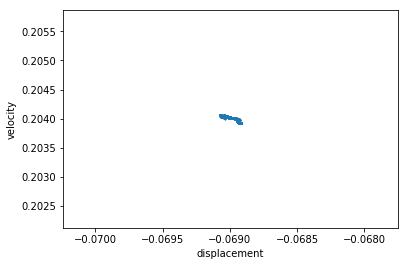

In [51]:
sim_pendulum_strobo((0.2, .1, 0.1))

At low forcing amplitude, we see periodicity within the numerical precision of the simulation.

9990
100.0


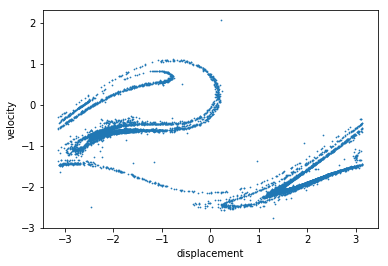

In [50]:
sim_pendulum_strobo((.8, .1, 0.1))

9990
100.0


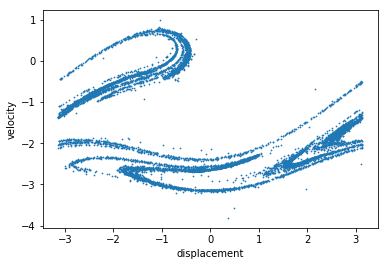

In [44]:
sim_pendulum_strobo((1.25, .1, 0.1), t_stop=100000)

Let's zoom into the picture:

99900
10.0


(-3, -1)

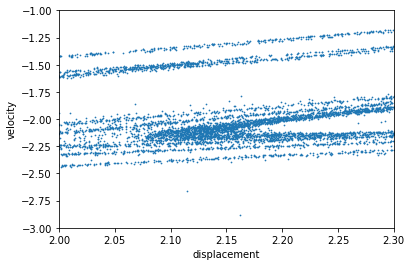

In [47]:
sim_pendulum_strobo((1.15, .1, 0.1), t_stop=1000000., t_steps=1000001)
plt.xlim(2.0, 2.3)
plt.ylim(-3,-1)

99900
10.0


(-1, 1)

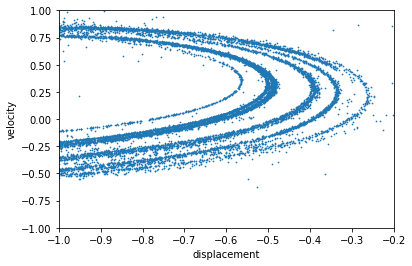

In [48]:
sim_pendulum_strobo((1.15, .1, 0.1), t_stop=1000000., t_steps=1000001)
plt.xlim(-1.0, -0.2)
plt.ylim(-1,1)

Let's try a forcing of the second kind:

In [61]:
def forced_pendulum2(t, u, g, m, w):
    u_1 = u[0]
    u_2 = u[1]
    u_3 = u[2]
    
    f_1 = u_2
    f_2 = -2. * g * u_2 - np.sin(u_1) + m*np.sin(3/5 * w *np.pi * 2 * u_3) * np.sin(w * u_3 *np.pi * 2)
    f_3 = 1.
    
    return [f_1, f_2, f_3]


def sim_pendulum_strobo2(params, u0=[0,0,0], t_start=0., t_stop=100000., t_steps=1000001):
    m, g, w = params
    
    t_range = np.linspace(t_start, t_stop, int(t_steps))

    solution = solve_ivp(lambda t, u: forced_pendulum2(t, u, g, m, w), t_span=(t_start, t_stop), y0=u0, t_eval=t_range)
    solution.y[0] = [a % (2*np.pi) - np.pi for a in solution.y[0] + np.pi]

    u1=solution.y[0][10000:-1:int(1/w*(t_steps-1)/(t_stop-t_start))]
    u2=solution.y[1][10000:-1:int(1/w*(t_steps-1)/(t_stop-t_start))]
    plt.scatter(u1, u2, s=0.5)
    plt.xlabel('displacement')
    plt.ylabel('velocity')
    print(len(u1))
    print(1/w*(t_steps-1)/(t_stop-t_start))
    #print(solution.y[1])

9900
100.0


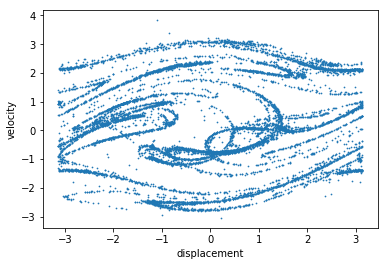

In [62]:
sim_pendulum_strobo2((1.25, .1, 0.1), t_stop=100000)

## 4) motion in fragile region

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy.integrate import solve_ivp

%matplotlib inline

In [2]:
def forced_pendulum(t, u, g, m, w):
    u_1 = u[0]
    u_2 = u[1]
    u_3 = u[2]
    
    f_1 = u_2
    f_2 = -2. * g * u_2 - np.sin(u_1) + m * np.sin(w * u_3)
    f_3 = 1.
    
    return [f_1, f_2, f_3]

In [3]:
def plot_pendulum_solution(solution, params=None, t_stop=500):
    N = len(solution.y[0])
    cmap = plt.cm.jet(np.linspace(0, 1, N))
    cbar = plt.cm.jet
    norm = mpl.colors.Normalize(vmin=solution.t[0], vmax=solution.t[-1])

    fig = plt.figure()
    ax1 = plt.subplot2grid((3, 1), (0, 0))
    ax2 = plt.subplot2grid((3, 1), (1, 0), rowspan=2)

    cax = ax1.twinx()
    mpl.colorbar.ColorbarBase(cax, cmap=cbar, norm=norm, orientation='horizontal')
    cax.set_ylim(0,40*t_stop)
    
    if params:
        ax1.set_title(r'$\mu = {},\ \gamma = {},\ \omega = {}$'.format(*params))

    ax1.plot(solution.y[2]+solution.t[0], solution.y[0], label=r'$u_1$')
    ax1.plot(solution.y[2]+solution.t[0], solution.y[1], label=r'$u_2$')
    
    ax1.set_xlabel(r'time $t$')
    ax1.set_ylabel(r'$u_i$')

    ax1.legend(markerscale=20, framealpha=1, loc=1)

    ax1.set_xlim(solution.t[0], solution.t[-1])
    ax1.set_ylim(-np.pi, np.pi)

    ax2.scatter(*solution.y[:2], s=1, marker='.', c = cmap)
    
    ax2.set_xlabel(r'$u_1$')
    ax2.set_ylabel(r'$u_2$')

    ax2.set_xlim(-np.pi, np.pi)
    
    print(cax.get_ylim())
    
    fig.set_size_inches(8, 12)
    plt.show()
    
def sim_pendulum(params, u0=[0,0,0], t_start=0., t_stop=500., t_steps=100000):
    m, g, w = params
    
    t_range = np.linspace(t_start, t_stop, int(t_steps))

    solution = solve_ivp(lambda t, u: forced_pendulum(t, u, g, m, w), t_span=(t_start, t_stop), y0=u0, t_eval=t_range)
    solution.y[0] = [a % (2*np.pi) - np.pi for a in solution.y[0] + np.pi]

    pos = np.where(np.abs(np.diff(solution.y[0])) >= .5 )[0]+1
    solution.y = [np.insert(solution.y[0], pos, np.nan), 
                  np.insert(solution.y[1], pos, np.nan), 
                  np.insert(solution.y[2], pos, np.nan)]

    plot_pendulum_solution(solution, (m,g,w), t_stop)

### a)

Spin up phase of the trajectory:

(0.0, 4000.0)


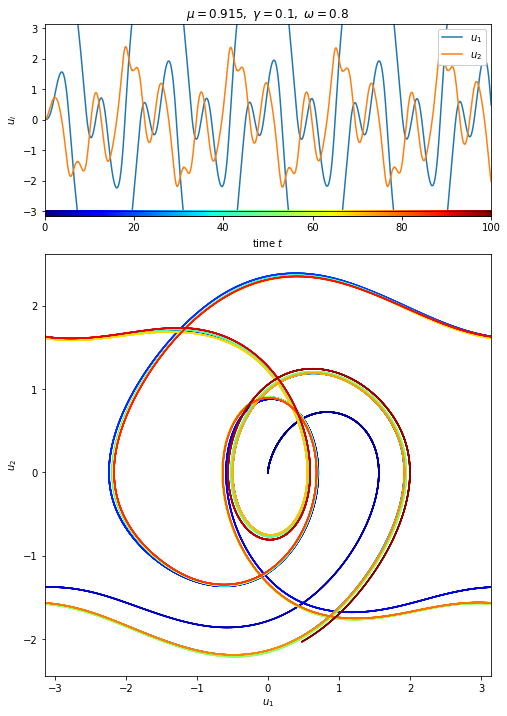

In [4]:
sim_pendulum((.915, .1, .8), t_stop=100.)

### b)

(0.0, 20000.0)


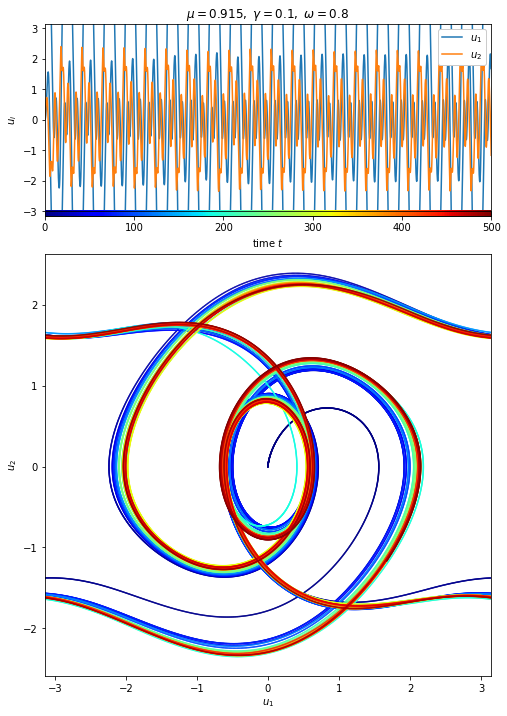

In [5]:
sim_pendulum((.915, .1, .8), t_stop=500)

#### i)
Folowing the red line, we can see that the attractor has **periodicity 3**.

#### ii)
It is hard to tell by eye, if the attractor is symmetric or not. But if we look ath the bifucation diagramm (*Figure 4.15*) we see that one attractor split into to for a slightly smaller $\mu$. Therefore this attractor has a mirrored counterpard and is **not symmetric**.

### c)

We now look at different values for $\mu$ around the bifurcation point to see what happens:

(0.0, 20000.0)


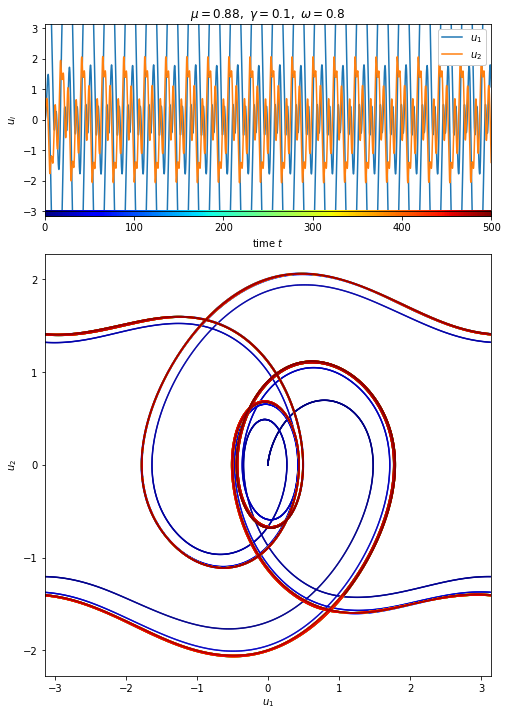

In [6]:
sim_pendulum((.88, .1, .8))

We start with $\mu = 0.88$. The trajectory is symmetric and has three intersections with the positive $u_1$-axis.

(0.0, 20000.0)


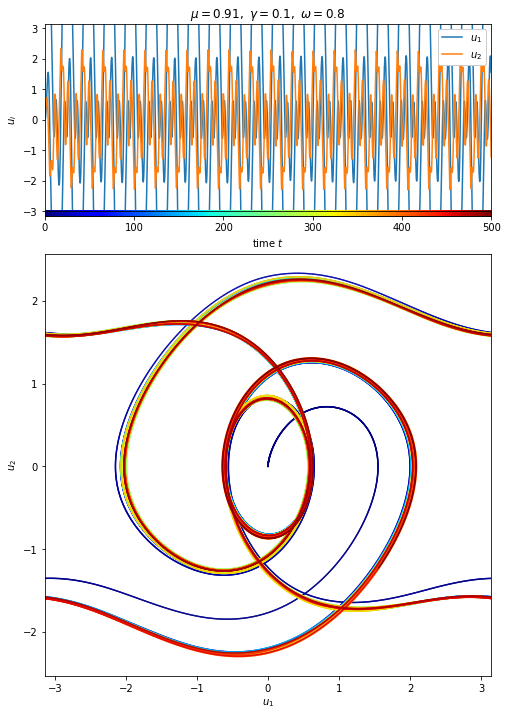

In [7]:
sim_pendulum((.91, .1, .8))

For $\mu = 0.91$ the trajectory is still symmetric, but two of the three intersections with the $u_1$-axis merged onto the same point.

(0.0, 20000.0)


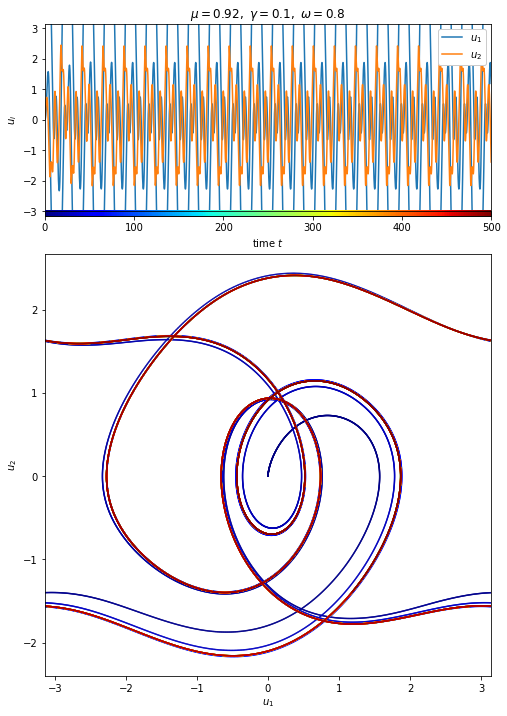

In [8]:
sim_pendulum((.92, .1, .8))

For $\mu = 9.2$, the intersection points are different again. But this time the trajectory is not symmetric anymore. If we compare the "movement" of the two intersection pairs (left and right from the origin) we see that the right pair passed through each other, while the left pair touched but moved back like they approached before.

This is the same constelation as seen in part b).